# Porto Seguro's Safe Driver Prediction

In [ ]:
import matplotlib.pyplot as plt
from training_model import *

### Load data

In [ ]:
full_train_df.head()

In [ ]:
assert full_train_df.isnull().sum().sum() == 0
full_train_df.columns

In [ ]:
full_train_df['target'].describe()

In [ ]:
print(X.shape, y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
def plot_model(model):
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    ax[0].plot(range(1, len(model.history['acc']) + 1), model.history['acc'])
    ax[0].plot(range(1, len(model.history['val_acc']) + 1), model.history['val_acc'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')

    ax[1].plot(range(1, len(model.history['loss']) + 1), model.history['loss'])
    ax[1].plot(range(1, len(model.history['val_loss']) + 1), model.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')

In [8]:
model_history = auto_encoder(X=X_train, y=X_train, encoded_dim=hidden_units)

In [10]:
model = load_model('auto_encoder.weights.h5')

In [11]:
pred = model.predict(X_test)

In [14]:
mse = np.mean(np.power(X_test - pred, 2), axis=1)

In [34]:
error_df = pd.DataFrame({'psudo_error': mse, 'true_class': y_test})
error_df.describe()

,psudo_error,true_class
count,119043.000000,119043.000000
mean,0.053721,0.036071
std,0.022177,0.186468
min,0.010210,0.000000
25%,0.038744,0.000000
50%,0.050284,0.000000
75%,0.064705,0.000000
max,0.469194,1.000000


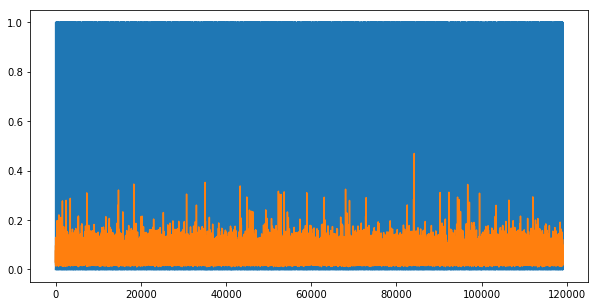

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(y_test)
ax.plot(mse)
plt.show()

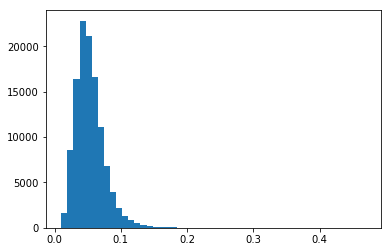

In [36]:
normal_error_df = error_df[error_df['true_class'] == 0 & (error_df['psudo_error'] < 0.2)]
plt.hist(normal_error_df['psudo_error'].values, bins=50)
plt.show()

In [37]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [38]:
fpr, tpr, thresholds = roc_curve(error_df['true_class'], error_df['psudo_error'])

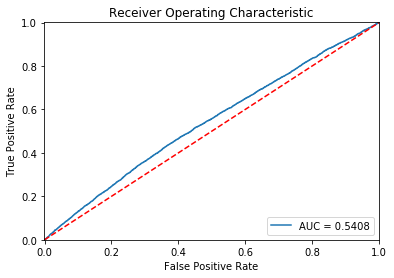

In [39]:
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

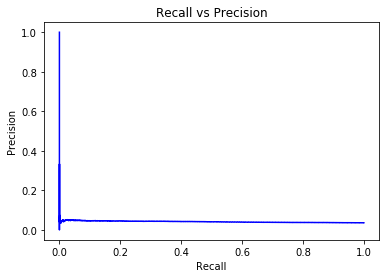

In [41]:
precision, recall, th = precision_recall_curve(error_df['true_class'], error_df['psudo_error'])
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

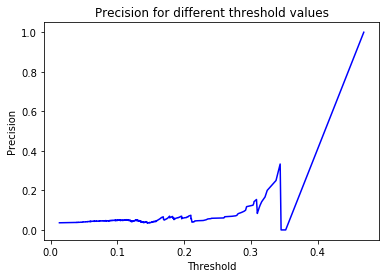

In [42]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

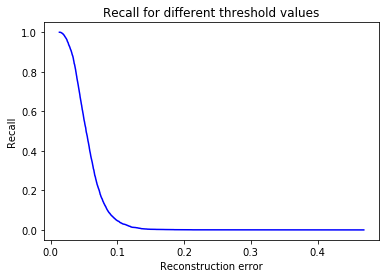

In [43]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [49]:
groups = error_df.groupby('true_class')

In [55]:
threshold = 0.15

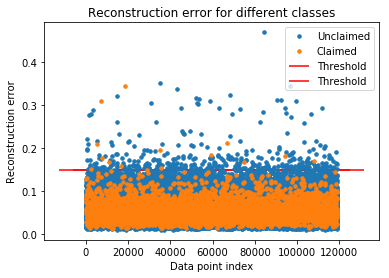

In [59]:
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group['psudo_error'], marker='o', ms=3.5, linestyle='', label='Claimed' if name == 1 else 'Unclaimed')
    ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors='r', label='Threshold')
    ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [61]:
y_pred = error_df['psudo_error'].map(lambda x: 1 if x > threshold else 0)

In [62]:
import seaborn as sns

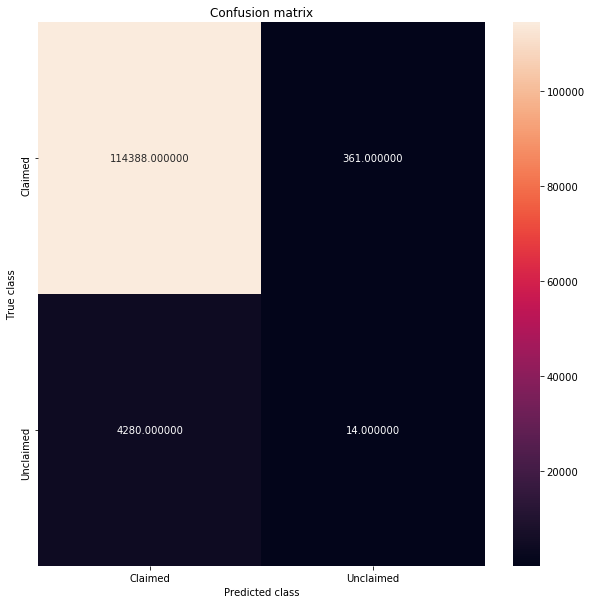

In [63]:
conf_matrix = confusion_matrix(error_df['true_class'], y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, xticklabels=['Claimed', 'Unclaimed'], yticklabels=['Claimed', 'Unclaimed'], annot=True, fmt='f')
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()           

In [78]:
test_df.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [80]:
x_test = np.array(test_df[[i for i in train_cols if i not in ['target', 'id', 'ps_car_11_cat']]])

In [81]:
x_test.shape

(892816, 39)

In [82]:
y_pred = model.predict(x_test)

In [85]:
y_submit = np.mean(y_pred, axis=1)
y_submit.shape

(892816,)

In [90]:
test_df = pd.read_csv('test.csv')

In [94]:
y_submit[y_submit < threshold] = 1
y_submit[y_submit > threshold] = 0

In [95]:
y_submit[:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [96]:
submission = pd.DataFrame({'id': test_df['id'], 'target': y_submit})
submission.to_csv('submissions/submission_{}.csv'.format(9), index=False)